## Data  개요

**소상공인시장진흥공단_상가(상권)정보**

- 영업 중인 전국 상가업소 데이터를 제공
- (상호명, 업종코드, 업종명, 지번주소, 도로명주소, 경도, 위도 등)

- 공공 데이터 포털 
https://www.data.go.kr/data/15083033/fileData.do

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
pd.options.display.max_columns = 39

## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**예시**

- (1) 서초구에는 어떤 음식점 업종이 많을까?
- (2) 구별 음식점 업종 분포는 어떻게 다를까?
- (3) 어느 구에 학원수가 많을까?
- (4) 구별 학원 분포는 어떻게 다를까?
- (5) 관심 동네 비교해보기

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

### 2.1 수집(gather)

In [3]:
sales = pd.read_csv('./Datasets/소상공인시장진흥공단_상가(상권)정보_서울_202209.csv')

### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     361490 non-null  int64  
 1   상호명        361490 non-null  object 
 2   지점명        61624 non-null   object 
 3   상권업종대분류코드  361490 non-null  object 
 4   상권업종대분류명   361490 non-null  object 
 5   상권업종중분류코드  361490 non-null  object 
 6   상권업종중분류명   361490 non-null  object 
 7   상권업종소분류코드  361490 non-null  object 
 8   상권업종소분류명   361490 non-null  object 
 9   표준산업분류코드   336942 non-null  object 
 10  표준산업분류명    336942 non-null  object 
 11  시도코드       361490 non-null  int64  
 12  시도명        361490 non-null  object 
 13  시군구코드      361490 non-null  int64  
 14  시군구명       361490 non-null  object 
 15  행정동코드      361490 non-null  int64  
 16  행정동명       361490 non-null  object 
 17  법정동코드      361490 non-null  int64  
 18  법정동명       361490 non-null  object 
 19  지번코드       361490 non-n

**인덱스 정보 보기**

In [8]:
sales.describe()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,호정보,경도,위도
count,3.614900e+05,361490.0,361490.000000,3.614900e+05,3.614900e+05,3.614900e+05,361490.000000,361490.000000,286583.000000,3.614900e+05,361490.000000,48289.000000,361490.000000,361490.000000,0.0,361490.000000,361490.000000
mean,1.931741e+07,11.0,11447.440953,1.144806e+09,1.144755e+09,1.144755e+18,1.000714,422.386384,35.504465,1.144780e+11,139.732366,8.071507,137050.810033,5207.071902,NaN,126.993759,37.544906
std,4.309452e+06,0.0,196.827914,1.968164e+07,1.968207e+07,1.968207e+16,0.026706,426.373510,106.040693,1.968288e+09,259.077055,9.766006,14338.428718,2149.908034,NaN,0.083937,0.049022
min,2.896730e+06,11.0,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,1.000000,1.000000,100011.000000,1000.000000,NaN,126.768169,37.434081
25%,1.673368e+07,11.0,11260.000000,1.126066e+09,1.126010e+09,1.126011e+18,1.000000,102.000000,4.000000,1.126041e+11,19.000000,1.000000,131823.000000,3440.000000,NaN,126.922367,37.504588
50%,1.822703e+07,11.0,11470.000000,1.147056e+09,1.147010e+09,1.147010e+18,1.000000,301.000000,11.000000,1.147031e+11,46.000000,5.000000,137726.000000,5288.000000,NaN,127.009557,37.542195
75%,2.307572e+07,11.0,11650.000000,1.165052e+09,1.165010e+09,1.165010e+18,1.000000,644.000000,28.000000,1.165021e+11,154.000000,11.000000,150092.000000,6957.000000,NaN,127.056107,37.572518
max,2.852486e+07,11.0,11740.000000,1.174070e+09,1.174011e+09,1.174011e+18,2.000000,9999.000000,3784.000000,1.174049e+11,3581.000000,203.000000,158887.000000,8866.000000,NaN,127.182588,37.690787


In [9]:
sales.index

RangeIndex(start=0, stop=361490, step=1)

**컬럼 정보 보기**

In [11]:
sales.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

**요약 정보 보기**

In [7]:
sales.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1156010600100410001,1,대지,41,1.0,서울특별시 영등포구 영등포동5가 41-1,115604154799,서울특별시 영등포구 영중로14길,11,17.0,1156010600100410002034626,NaN,"서울특별시 영등포구 영중로14길 11-17, (영등포동5가)",150030,7250,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,악기 소매업,11,서울특별시,11200,성동구,1120079000,용답동,1120012200,용답동,1120012200101420011,1,대지,142,11.0,서울특별시 성동구 용답동 142-11,112004109480,서울특별시 성동구 용답5길,2,NaN,1120012200101420011000227,NaN,"서울특별시 성동구 용답5길 2, (용답동)",133849,4803,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,시계 및 귀금속 소매업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111015200,봉익동,1111015200100430001,1,대지,43,1.0,서울특별시 종로구 봉익동 43-1,111104100163,서울특별시 종로구 서순라길,17,10.0,1111015200100440000000001,금사랑투빌딩,"서울특별시 종로구 서순라길 17-10, (봉익동)",110390,3138,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11710,송파구,1171056100,방이1동,1171011100,방이동,1171011100101970003,1,대지,197,3.0,서울특별시 송파구 방이동 197-3,117104169448,서울특별시 송파구 위례성대로12길,31,NaN,1171011100101970003017195,NaN,"서울특별시 송파구 위례성대로12길 31, (방이동)",138834,5640,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,"서울특별시 서초구 동광로18길 82, (방배동)",137837,6572,NaN,1,NaN,126.991394,37.488375


**누락 데이터 확인**

In [15]:
sales.isnull().sum()

상가업소번호            0
상호명               0
지점명          299866
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      24548
표준산업분류명       24548
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         74907
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        313201
건물관리번호            0
건물명          182393
도로명주소             0
구우편번호             0
신우편번호             0
동정보          320442
층정보          140405
호정보          361490
경도                0
위도                0
dtype: int64

### 2.3 정제(clean)

**누락 데이터가 많은 컬럼 삭제**

In [23]:
sales.drop(['지점명', '표준산업분류코드', '표준산업분류명', '지번부번지', '건물부번지', '건물명', '동정보', '층정보', '호정보'], axis = 1, inplace = True)

In [24]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     361490 non-null  int64  
 1   상호명        361490 non-null  object 
 2   상권업종대분류코드  361490 non-null  object 
 3   상권업종대분류명   361490 non-null  object 
 4   상권업종중분류코드  361490 non-null  object 
 5   상권업종중분류명   361490 non-null  object 
 6   상권업종소분류코드  361490 non-null  object 
 7   상권업종소분류명   361490 non-null  object 
 8   시도코드       361490 non-null  int64  
 9   시도명        361490 non-null  object 
 10  시군구코드      361490 non-null  int64  
 11  시군구명       361490 non-null  object 
 12  행정동코드      361490 non-null  int64  
 13  행정동명       361490 non-null  object 
 14  법정동코드      361490 non-null  int64  
 15  법정동명       361490 non-null  object 
 16  지번코드       361490 non-null  int64  
 17  대지구분코드     361490 non-null  int64  
 18  대지구분명      361490 non-null  object 
 19  지번본번지      361490 non-n

**컬럼명에 "코드" 또는 "번호"가 들어간 컬럼 삭제**

In [26]:
sales.drop(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드', '행정동코드',
             '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호', '신우편번호'], axis = 1, inplace = True)

In [28]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       361490 non-null  object 
 1   상권업종대분류명  361490 non-null  object 
 2   상권업종중분류명  361490 non-null  object 
 3   상권업종소분류명  361490 non-null  object 
 4   시도명       361490 non-null  object 
 5   시군구명      361490 non-null  object 
 6   행정동명      361490 non-null  object 
 7   법정동명      361490 non-null  object 
 8   대지구분명     361490 non-null  object 
 9   지번본번지     361490 non-null  int64  
 10  지번주소      361490 non-null  object 
 11  도로명       361490 non-null  object 
 12  건물본번지     361490 non-null  int64  
 13  도로명주소     361490 non-null  object 
 14  경도        361490 non-null  float64
 15  위도        361490 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 44.1+ MB


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

In [30]:
sales.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,대지,41,서울특별시 영등포구 영등포동5가 41-1,서울특별시 영등포구 영중로14길,11,"서울특별시 영등포구 영중로14길 11-17, (영등포동5가)",126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,대지,142,서울특별시 성동구 용답동 142-11,서울특별시 성동구 용답5길,2,"서울특별시 성동구 용답5길 2, (용답동)",127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,대지,43,서울특별시 종로구 봉익동 43-1,서울특별시 종로구 서순라길,17,"서울특별시 종로구 서순라길 17-10, (봉익동)",126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,대지,197,서울특별시 송파구 방이동 197-3,서울특별시 송파구 위례성대로12길,31,"서울특별시 송파구 위례성대로12길 31, (방이동)",127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,"서울특별시 서초구 동광로18길 82, (방배동)",126.991394,37.488375


In [34]:
sa_corr = sales.corr()

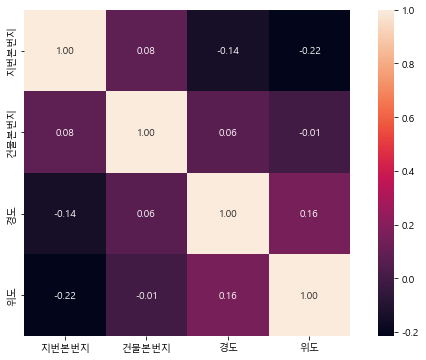

In [36]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(sa_corr, annot=True, fmt = '.2f', square=True);

**기술 통계 요약**

In [31]:
sales.describe()

,지번본번지,건물본번지,경도,위도
count,361490.000000,361490.000000,361490.000000,361490.000000
mean,422.386384,139.732366,126.993759,37.544906
std,426.373510,259.077055,0.083937,0.049022
min,1.000000,1.000000,126.768169,37.434081
25%,102.000000,19.000000,126.922367,37.504588
50%,301.000000,46.000000,127.009557,37.542195
75%,644.000000,154.000000,127.056107,37.572518
max,9999.000000,3581.000000,127.182588,37.690787


In [32]:
sales.describe(include = 'object')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490
unique,263524,8,89,677,1,25,425,463,2,134165,12408,133359
top,CU,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,"서울특별시 종로구 종로 266, (종로6가)"
freq,1702,121534,39624,29155,361490,35511,6628,8292,361232,892,2263,898


### 3.1 히스토그램으로 수치 데이터의 분포 한눈에 확인하기
- **히스토그램(histogram)** : 수치형 데이터의 구간별 빈도수를 나타내는 그래프

지번본번지, 건물본번지, 경도, 위도

array([[<AxesSubplot:title={'center':'지번본번지'}>,
        <AxesSubplot:title={'center':'건물본번지'}>],
       [<AxesSubplot:title={'center':'경도'}>,
        <AxesSubplot:title={'center':'위도'}>]], dtype=object)

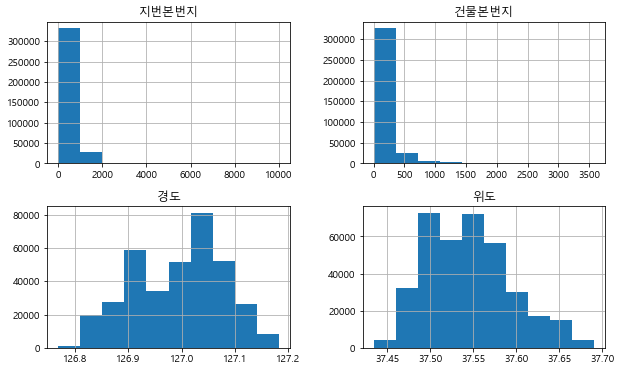

In [40]:
sales[['지번본번지', '건물본번지', '경도', '위도']].hist(figsize = (10, 6))

### 3.2 상관 계수로 두 변량간의 관계 파악하기

In [41]:
sales.corr()

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.079527,-0.143662,-0.215020
건물본번지,0.079527,1.000000,0.061893,-0.005848
경도,-0.143662,0.061893,1.000000,0.155010
위도,-0.215020,-0.005848,0.155010,1.000000


* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

### 3.3 문자열 데이터에 대한 요약

- 상권업종대분류명 요약

In [48]:
sales['상권업종대분류명'].describe()

count     361490
unique         8
top           음식
freq      121534
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 unique 값

In [45]:
sales['상권업종대분류명'].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명 의 unique 값의 갯수

In [47]:
sales['상권업종대분류명'].nunique()

8

- 상권업종대분류명 의 최빈값

In [49]:
sales['상권업종대분류명'].mode()

0    음식
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 빈도수

In [50]:
sales['상권업종대분류명'].value_counts()

음식          121534
소매          103889
생활서비스        74450
학문/교육        26193
부동산          18600
관광/여가/오락      9167
스포츠           5290
숙박            2367
Name: 상권업종대분류명, dtype: int64

### 3.4 구별 음식점 업종 비교하기

#### (1) 서초구에는 어떤 음식점 업종이 많을까?

- 서초구에서 상권업종대분류명이 음식인 데이터만 가져오기

In [47]:
a = sales[(sales['상권업종대분류명'] == '음식') & (sales['시군구명'] == '서초구')]
a

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,"서울특별시 서초구 동광로18길 82, (방배동)",137837,6572,NaN,1,NaN,126.991394,37.488375
6,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800114850003,1,대지,1485,3.0,서울특별시 서초구 서초동 1485-3,116503121021,서울특별시 서초구 효령로,230,NaN,1165010800114850004022127,NaN,"서울특별시 서초구 효령로 230, (서초동)",137869,6709,NaN,1,NaN,127.009382,37.483436
24,28478395,장수식당,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165054000,잠원동,1165010600,잠원동,1165010600100290003,1,대지,29,3.0,서울특별시 서초구 잠원동 29-3,116504163039,서울특별시 서초구 강남대로95길,17,NaN,1165010600100290003019323,아람빌딩,"서울특별시 서초구 강남대로95길 17, (잠원동)",137904,6530,NaN,1,NaN,127.018983,37.513638
32,28503146,북경깐풍기,강남점,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,중식 음식점업,11,서울특별시,11650,서초구,1165053100,서초4동,1165010800,서초동,1165010800113070018,1,대지,1307,18.0,서울특별시 서초구 서초동 1307-18,116504163029,서울특별시 서초구 강남대로65길,7,NaN,1165010800113070018027310,피렌체타워,"서울특별시 서초구 강남대로65길 7, (서초동)",137856,6614,NaN,NaN,NaN,127.025310,37.500247
60,28490126,라이브존레스토랑,NaN,Q,음식,Q06,양식,Q06A05,패밀리레스토랑,I56114,서양식 음식점업,11,서울특별시,11650,서초구,1165058100,반포4동,1165010700,반포동,1165010700100830016,1,대지,83,16.0,서울특별시 서초구 반포동 83-16,116504163135,서울특별시 서초구 동광로49길,7,NaN,1165010700100830016017148,양지빌딩,"서울특별시 서초구 동광로49길 7, (반포동)",137805,6580,NaN,NaN,NaN,127.001978,37.493519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361185,18756327,마실,NaN,Q,음식,Q09,유흥주점,Q09A03,꼬치구이전문점,I56219,기타 주점업,11,서울특별시,11650,서초구,1165056000,반포1동,1165010700,반포동,1165010700107050007,1,대지,705,7.0,서울특별시 서초구 반포동 705-7,116503121017,서울특별시 서초구 신반포로,326,13.0,1165010700107050007018441,NaN,"서울특별시 서초구 신반포로 326-13, (반포동)",137808,6534,NaN,1,NaN,127.019767,37.509869
361258,18751482,커피앤와플타임,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11650,서초구,1165052000,서초2동,1165010800,서초동,1165010800113600006,1,대지,1360,6.0,서울특별시 서초구 서초동 1360-6,116504163084,서울특별시 서초구 남부순환로347길,48,7.0,1165010800113600006022817,NaN,"서울특별시 서초구 남부순환로347길 48-7, (서초동)",137863,6730,NaN,1,NaN,127.031458,37.486619
361302,18749956,클립커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11650,서초구,1165056000,반포1동,1165010700,반포동,1165010700107050007,1,대지,705,7.0,서울특별시 서초구 반포동 705-7,116503121017,서울특별시 서초구 신반포로,326,13.0,1165010700107050007018441,NaN,"서울특별시 서초구 신반포로 326-13, (반포동)",137808,6534,NaN,1,NaN,127.019767,37.509869
361304,18769884,서래셀부루,NaN,Q,음식,Q09,유흥주점,Q09A10,룸살롱/단란주점,I56211,일반유흥 주점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108130007,1,대지,813,7.0,서울특별시 서초구 방배동 813-7,116503121004,서울특별시 서초구 동광로,70,NaN,1165010100108130007008789,NaN,"서울특별시 서초구 동광로 70, (방배동)",137832,6562,NaN,NaN,NaN,126.990252,37.492591


In [48]:
a.describe(include = 'object')

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보
count,6118,1771,6118,6118,6118,6118,6118,6118,6103,6103,6118,6118,6118,6118,6118,6118,6118,6118,3963,6118,365,4684
unique,5406,559,1,1,14,14,99,99,16,16,1,1,18,10,1,3064,450,3046,1471,3048,73,33
top,카페,서초점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,서울특별시,서초구,서초3동,서초동,대지,서울특별시 서초구 반포동 19-3,서울특별시 서초구 신반포로,1165010700100190003000001,강남고속버스터미널,"서울특별시 서초구 신반포로 176, (반포동)",1,1
freq,43,143,6118,6118,1966,1966,1511,1511,2296,2296,6118,6118,843,2199,6118,109,349,109,61,109,118,3544


**분석결과** : 한식집이 가장 많다.

#### (2) 구별 업종(상권업종중분류명 기준)  분포 비교하기

- 상권업종대분류명 이 음식인 데이터 준비

In [49]:
s = sales[(sales['상권업종대분류명'] == '음식')]
s

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,"서울특별시 서초구 동광로18길 82, (방배동)",137837,6572,NaN,1,NaN,126.991394,37.488375
5,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11590,동작구,1159063000,사당2동,1159010700,사당동,1159010700101390072,1,대지,139,72.0,서울특별시 동작구 사당동 139-72,115904157119,서울특별시 동작구 동작대로27가길,12,NaN,1159010700101390073009536,NaN,"서울특별시 동작구 동작대로27가길 12, (사당동)",156816,7008,NaN,NaN,NaN,126.980952,37.487105
6,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800114850003,1,대지,1485,3.0,서울특별시 서초구 서초동 1485-3,116503121021,서울특별시 서초구 효령로,230,NaN,1165010800114850004022127,NaN,"서울특별시 서초구 효령로 230, (서초동)",137869,6709,NaN,1,NaN,127.009382,37.483436
7,25530299,고향생막걸리,NaN,Q,음식,Q09,유흥주점,Q09A04,민속주점,I56219,기타 주점업,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1168010700106150001,1,대지,615,1.0,서울특별시 강남구 신사동 615-1,116803122007,서울특별시 강남구 압구정로,216,NaN,1168010700106150001009703,코끼리상가,"서울특별시 강남구 압구정로 216, (신사동)",135894,6023,NaN,1,NaN,127.031012,37.528073
12,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11740,강동구,1174056000,고덕2동,1174010200,고덕동,1174010200106930000,1,대지,693,NaN,서울특별시 강동구 고덕동 693,117403124001,서울특별시 강동구 고덕로,333,NaN,1174010200102170000018014,고덕그라시움,"서울특별시 강동구 고덕로 333, (고덕동, 고덕그라시움아파트)",134082,5224,NaN,NaN,NaN,127.159471,37.556197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361472,18760226,댄싱컵,가재울점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11410,서대문구,1141070000,남가좌2동,1141012000,남가좌동,1141012000103900000,1,대지,390,NaN,서울특별시 서대문구 남가좌동 390,114103112003,서울특별시 서대문구 거북골로,100,NaN,1141012000101750000005766,래미안루센티아,"서울특별시 서대문구 거북골로 100, (남가좌동, 래미안루센티아)",120122,3689,상가,NaN,NaN,126.918228,37.575633
361480,18759187,플랫카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11215,광진구,1121585000,구의1동,1121510300,구의동,1121510300106350002,1,대지,635,2.0,서울특별시 광진구 구의동 635-2,112154112427,서울특별시 광진구 자양로23길,73,NaN,1121510300106350002010237,에프앤빌딩(F&BUILDING),"서울특별시 광진구 자양로23길 73, (구의동)",143835,5023,NaN,1,NaN,127.083681,37.543595
361483,18760042,산마을쌈밥집,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11380,은평구,1138053000,불광2동,1138010300,불광동,1138010300101570001,1,대지,157,1.0,서울특별시 은평구 불광동 157-1,113803111004,서울특별시 은평구 불광로,181,NaN,1138010300101570001036927,NaN,"서울특별시 은평구 불광로 181, (불광동)",122852,3346,NaN,2,NaN,126.930927,37.622557
361484,18757537,달래해장종각점1호,NaN,Q,음식,Q01,한식,Q01A05,해장국/감자탕,I56111,한식 음식점업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111013500,관철동,1111013500100180003,1,대지,18,3.0,서울특별시 종로구 관철동 18-3,111104100214,서울특별시 종로구 우정국로2길,41,NaN,1111013500100180003000001,NaN,"서울특별시 종로구 우정국로2길 41, (관철동)",110111,3189,NaN,1,NaN,126.985375,37.569661


- 시군구명, 상권업종중분류명 으로 그룹화 해서 상점수 개수 구하기

In [50]:
ss = s.groupby(['시군구명', '상권업종중분류명']).size()
ss

시군구명  상권업종중분류명
강남구   기타음식업         49
      닭/오리요리       340
      별식/퓨전요리      224
      부페            47
      분식           751
                  ... 
중랑구   제과제빵떡케익      180
      중식            80
      커피점/카페       511
      패스트푸드        178
      한식          1247
Length: 348, dtype: int64

- 전체 업종별 평균 시각화하기

In [51]:
aaa = ss.groupby(['상권업종중분류명']).mean()
aaa

상권업종중분류명
기타음식업        18.200000
닭/오리요리      227.040000
별식/퓨전요리     104.680000
부페           16.440000
분식          397.800000
양식          281.920000
유흥주점        465.520000
음식배달서비스       3.565217
일식/수산물      329.240000
제과제빵떡케익     215.600000
중식          147.600000
커피점/카페      833.680000
패스트푸드       235.400000
한식         1584.960000
dtype: float64

- 상권업종중분류명에 따른 상호수를 시각화하되 시군구명별로 모두 표시 (sns.catplot 이용)

<Figure size 1728x1152 with 0 Axes>

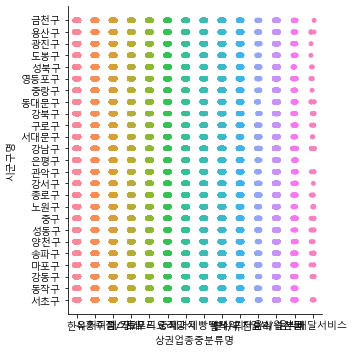

In [89]:
plt.figure(figsize = (24,16))
sns.catplot(data = s, y = '시군구명', x = '상권업종중분류명')

**분석결과** : 이게 뭐꼬

### 3.5 구별 학원수 비교하기

#### (1) 어느 구에 학원수가 많을까?

- 상권업종대분류명의 unique 값

In [12]:
sales['상권업종대분류명'].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명이 학문/교육인 데이터 가져오기

In [85]:
a = sales[(sales['상권업종대분류명'] == '학문/교육')]
a

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11710,송파구,1171056100,방이1동,1171011100,방이동,1171011100101970003,1,대지,197,3.0,서울특별시 송파구 방이동 197-3,117104169448,서울특별시 송파구 위례성대로12길,31,NaN,1171011100101970003017195,NaN,"서울특별시 송파구 위례성대로12길 31, (방이동)",138834,5640,NaN,2,NaN,127.121520,37.510967
8,21938782,무비디자인,NaN,R,학문/교육,R02,학원-창업취업취미,R02A12,학원-디자인,P85659,기타 기술 및 직업훈련학원,11,서울특별시,11440,마포구,1144060000,대흥동,1144011000,노고산동,1144011000101070017,1,대지,107,17.0,서울특별시 마포구 노고산동 107-17,114403005016,서울특별시 마포구 백범로,8,NaN,1144011000101070017018922,우정마샹스오피스텔,"서울특별시 마포구 백범로 8, (노고산동)",121807,4100,NaN,NaN,NaN,126.936717,37.553996
18,24676721,힐리빙텔,NaN,R,학문/교육,R10,도서관/독서실,R10A01,독서실,R90212,독서실 운영업,11,서울특별시,11410,서대문구,1141058500,신촌동,1141011200,대현동,1141011200100370069,1,대지,37,69.0,서울특별시 서대문구 대현동 37-69,114104136319,서울특별시 서대문구 이화여대5길,28,NaN,1141011200100370069023867,NaN,"서울특별시 서대문구 이화여대5길 28, (대현동)",120808,3766,NaN,NaN,NaN,126.944057,37.558414
19,24462056,김샘수학교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11140,중구,1114065000,신당5동,1114016200,신당동,1114016200108510000,1,대지,851,NaN,서울특별시 중구 신당동 851,111404103396,서울특별시 중구 퇴계로90길,74,NaN,1114016200100610043000001,래미안신당하이베르,"서울특별시 중구 퇴계로90길 74, (신당동, 래미안하이베르아파트)",100455,4582,NaN,NaN,NaN,127.020965,37.560996
43,24523198,노바수학학원,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11680,강남구,1168074000,일원2동,1168010300,개포동,1168010300100120004,1,대지,12,4.0,서울특별시 강남구 개포동 12-4,116803122001,서울특별시 강남구 개포로,615,NaN,1168010300100120004019079,석탑프라자,"서울특별시 강남구 개포로 615, (개포동)",135939,6335,NaN,NaN,NaN,127.075573,37.492649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361396,18760577,발돋움국어,NaN,R,학문/교육,R04,학원-어학,R04A01,학원-외국어/어학,P85502,외국어학원,11,서울특별시,11230,동대문구,1123072000,휘경1동,1123010900,휘경동,1123010900101830128,1,대지,183,128.0,서울특별시 동대문구 휘경동 183-128,112304115704,서울특별시 동대문구 회기로29길,12,NaN,1123010900101830128010104,NaN,"서울특별시 동대문구 회기로29길 12, (휘경동)",130876,2444,NaN,NaN,NaN,127.058136,37.590654
361408,18751729,길동리드인독서논술교습소,NaN,R,학문/교육,R09,학원기타,R09A01,학원(종합),P85501,일반 교과 학원,11,서울특별시,11740,강동구,1174068500,길동,1174010500,길동,1174010500101250008,1,대지,125,8.0,서울특별시 강동구 길동 125-8,117403124002,서울특별시 강동구 명일로,212,NaN,1174010500101250008002448,앙페르빌딩,"서울특별시 강동구 명일로 212, (길동)",134809,5345,NaN,1,NaN,127.146159,37.537513
361414,18762535,공방순수,NaN,R,학문/교육,R09,학원기타,R09A11,학원-기타,P85699,그외 기타 분류안된 교육기관,11,서울특별시,11620,관악구,1162060500,은천동,1162010100,봉천동,1162010100117180000,1,대지,1718,NaN,서울특별시 관악구 봉천동 1718,116203120009,서울특별시 관악구 은천로,93,NaN,1162010100117180000027810,벽산블루밍아파트,"서울특별시 관악구 은천로 93, (봉천동, 벽산블루밍아파트)",151778,8715,501,NaN,NaN,126.945884,37.487337
361467,18778038,수학교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11680,강남구,1168063000,대치4동,1168010600,대치동,1168010600109310001,1,대지,931,1.0,서울특별시 강남구 대치동 931-1,116804166420,서울특별시 강남구 삼성로67길,3,NaN,1168010600109310001013263,NaN,"서울특별시 강남구 삼성로67길 3, (대치동)",135998,6203,NaN,NaN,NaN,127.059093,37.501097


- 시군구명으로 빈도수 구하기

In [86]:
aaa = a['시군구명'].value_counts()
aaa

강남구     2586
송파구     1755
서초구     1699
양천구     1609
노원구     1495
강서구     1357
강동구     1341
은평구     1105
성북구     1102
마포구     1081
광진구     1059
관악구     1015
구로구     1010
동작구      998
영등포구     795
동대문구     779
중랑구      776
도봉구      759
서대문구     717
성동구      711
금천구      555
강북구      540
종로구      533
용산구      465
중구       351
Name: 시군구명, dtype: int64

- 빈도수 시각화하기

<AxesSubplot:xlabel='시군구명', ylabel='count'>

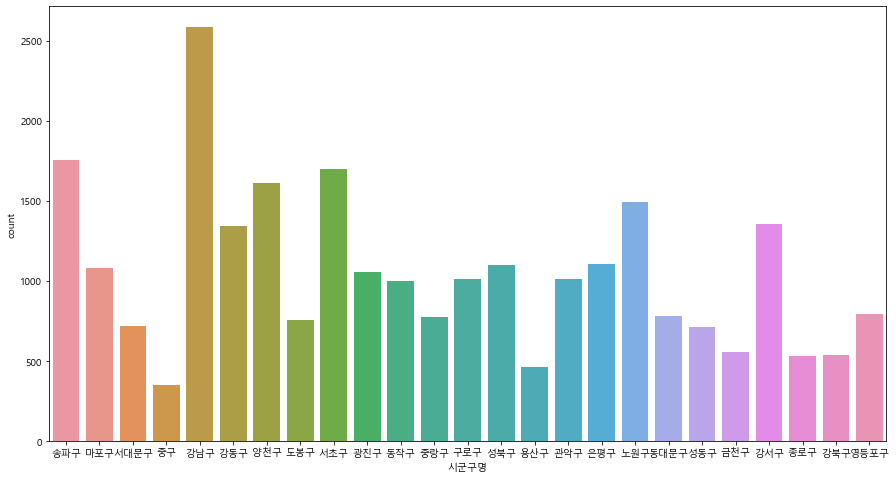

In [87]:
plt.figure(figsize = (15,8))
sns.countplot(data = a, x = '시군구명')

**분석 결과** : 역시 강남

#### (2) 구별 학원의 세부 업종 (상권업종소분류명 기준) 분포 비교하기

- 상권업종소분류명으로 빈도수를 구하기

In [32]:
x = sales['상권업종소분류명'].value_counts()
x

한식/백반/한정식      29155
커피전문점/카페/다방    20125
부동산중개          15990
여성미용실          15412
편의점             7201
               ...  
학원-텔렉스/통신          1
초상화제작              1
프로축구               1
가구판매-장농            1
화폐수집상              1
Name: 상권업종소분류명, Length: 677, dtype: int64

- 상권업종소분류명 빈도수 기준 상위 4개만 가져오기

In [33]:
x.iloc[0:4]

한식/백반/한정식      29155
커피전문점/카페/다방    20125
부동산중개          15990
여성미용실          15412
Name: 상권업종소분류명, dtype: int64

- 위에서 구한 상위 4개 업종으로만 데이터 가져오기

In [34]:
y = sales[(sales['상권업종소분류명'] == '한식/백반/한정식') | (sales['상권업종소분류명'] == '커피전문점/카페/다방') | 
      (sales['상권업종소분류명'] == '부동산중개') | (sales['상권업종소분류명'] == '여성미용실')]
y

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,"서울특별시 서초구 동광로18길 82, (방배동)",137837,6572,NaN,1,NaN,126.991394,37.488375
5,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11590,동작구,1159063000,사당2동,1159010700,사당동,1159010700101390072,1,대지,139,72.0,서울특별시 동작구 사당동 139-72,115904157119,서울특별시 동작구 동작대로27가길,12,NaN,1159010700101390073009536,NaN,"서울특별시 동작구 동작대로27가길 12, (사당동)",156816,7008,NaN,NaN,NaN,126.980952,37.487105
6,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800114850003,1,대지,1485,3.0,서울특별시 서초구 서초동 1485-3,116503121021,서울특별시 서초구 효령로,230,NaN,1165010800114850004022127,NaN,"서울특별시 서초구 효령로 230, (서초동)",137869,6709,NaN,1,NaN,127.009382,37.483436
10,22370147,연세공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,부동산 자문 및 중개업,11,서울특별시,11380,은평구,1138062500,역촌동,1138010800,역촌동,1138010800100170015,1,대지,17,15.0,서울특별시 은평구 역촌동 17-15,113803100020,서울특별시 은평구 진흥로,101,NaN,1138010800100170015017646,NaN,"서울특별시 은평구 진흥로 101, (역촌동)",122896,3404,NaN,1,NaN,126.922332,37.605891
12,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11740,강동구,1174056000,고덕2동,1174010200,고덕동,1174010200106930000,1,대지,693,NaN,서울특별시 강동구 고덕동 693,117403124001,서울특별시 강동구 고덕로,333,NaN,1174010200102170000018014,고덕그라시움,"서울특별시 강동구 고덕로 333, (고덕동, 고덕그라시움아파트)",134082,5224,NaN,NaN,NaN,127.159471,37.556197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361472,18760226,댄싱컵,가재울점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11410,서대문구,1141070000,남가좌2동,1141012000,남가좌동,1141012000103900000,1,대지,390,NaN,서울특별시 서대문구 남가좌동 390,114103112003,서울특별시 서대문구 거북골로,100,NaN,1141012000101750000005766,래미안루센티아,"서울특별시 서대문구 거북골로 100, (남가좌동, 래미안루센티아)",120122,3689,상가,NaN,NaN,126.918228,37.575633
361473,18757169,모수,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,부동산 자문 및 중개업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800115540009,1,대지,1554,9.0,서울특별시 서초구 서초동 1554-9,116504163239,서울특별시 서초구 반포대로30길,43,NaN,1165010800115540009020484,알바트로스빌딩,"서울특별시 서초구 반포대로30길 43, (서초동)",137873,6646,NaN,2,NaN,127.010894,37.492279
361480,18759187,플랫카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11215,광진구,1121585000,구의1동,1121510300,구의동,1121510300106350002,1,대지,635,2.0,서울특별시 광진구 구의동 635-2,112154112427,서울특별시 광진구 자양로23길,73,NaN,1121510300106350002010237,에프앤빌딩(F&BUILDING),"서울특별시 광진구 자양로23길 73, (구의동)",143835,5023,NaN,1,NaN,127.083681,37.543595
361483,18760042,산마을쌈밥집,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11380,은평구,1138053000,불광2동,1138010300,불광동,1138010300101570001,1,대지,157,1.0,서울특별시 은평구 불광동 157-1,113803111004,서울특별시 은평구 불광로,181,NaN,1138010300101570001036927,NaN,"서울특별시 은평구 불광로 181, (불광동)",122852,3346,NaN,2,NaN,126.930927,37.622557


- 상권업종소분류명, 시군구명으로 그룹화를 해서 빈도수 구하기

In [35]:
ss = y.groupby(['시군구명', '상권업종중분류명']).size()
ss

시군구명  상권업종중분류명
강남구   부동산중개       1960
      이/미용/건강     1193
      커피점/카페      2100
      한식          2884
강동구   부동산중개        781
                  ... 
중구    한식          1206
중랑구   부동산중개        476
      이/미용/건강      697
      커피점/카페       493
      한식           799
Length: 100, dtype: int64

#### (3) 위치 정보 시각화하기

- 위에서 구한 데이터를 구별로 시각화

<AxesSubplot:xlabel='시군구명', ylabel='count'>

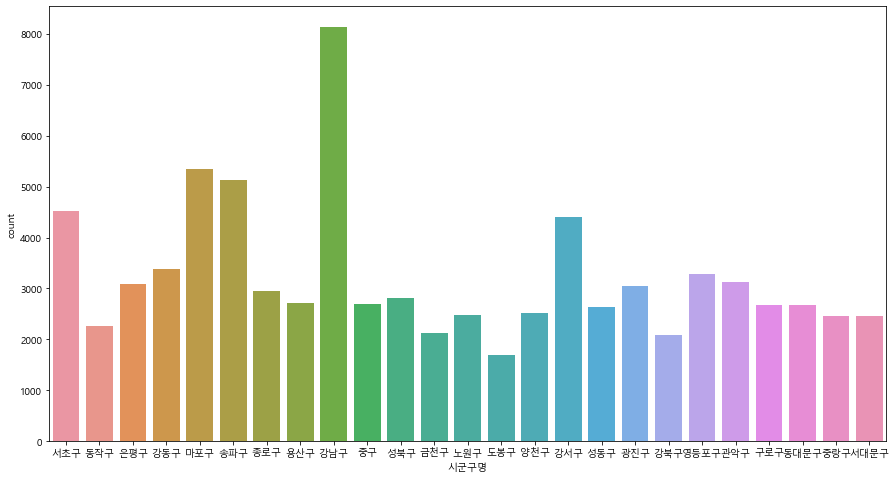

In [80]:
plt.figure(figsize = (15,8))
sns.countplot(data = y, x = '시군구명')

- 학원-입시 업종만 시각화

In [65]:
c = sales[(sales['상권업종대분류명'] == '학문/교육')]
c

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11710,송파구,1171056100,방이1동,1171011100,방이동,1171011100101970003,1,대지,197,3.0,서울특별시 송파구 방이동 197-3,117104169448,서울특별시 송파구 위례성대로12길,31,NaN,1171011100101970003017195,NaN,"서울특별시 송파구 위례성대로12길 31, (방이동)",138834,5640,NaN,2,NaN,127.121520,37.510967
8,21938782,무비디자인,NaN,R,학문/교육,R02,학원-창업취업취미,R02A12,학원-디자인,P85659,기타 기술 및 직업훈련학원,11,서울특별시,11440,마포구,1144060000,대흥동,1144011000,노고산동,1144011000101070017,1,대지,107,17.0,서울특별시 마포구 노고산동 107-17,114403005016,서울특별시 마포구 백범로,8,NaN,1144011000101070017018922,우정마샹스오피스텔,"서울특별시 마포구 백범로 8, (노고산동)",121807,4100,NaN,NaN,NaN,126.936717,37.553996
18,24676721,힐리빙텔,NaN,R,학문/교육,R10,도서관/독서실,R10A01,독서실,R90212,독서실 운영업,11,서울특별시,11410,서대문구,1141058500,신촌동,1141011200,대현동,1141011200100370069,1,대지,37,69.0,서울특별시 서대문구 대현동 37-69,114104136319,서울특별시 서대문구 이화여대5길,28,NaN,1141011200100370069023867,NaN,"서울특별시 서대문구 이화여대5길 28, (대현동)",120808,3766,NaN,NaN,NaN,126.944057,37.558414
19,24462056,김샘수학교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11140,중구,1114065000,신당5동,1114016200,신당동,1114016200108510000,1,대지,851,NaN,서울특별시 중구 신당동 851,111404103396,서울특별시 중구 퇴계로90길,74,NaN,1114016200100610043000001,래미안신당하이베르,"서울특별시 중구 퇴계로90길 74, (신당동, 래미안하이베르아파트)",100455,4582,NaN,NaN,NaN,127.020965,37.560996
43,24523198,노바수학학원,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11680,강남구,1168074000,일원2동,1168010300,개포동,1168010300100120004,1,대지,12,4.0,서울특별시 강남구 개포동 12-4,116803122001,서울특별시 강남구 개포로,615,NaN,1168010300100120004019079,석탑프라자,"서울특별시 강남구 개포로 615, (개포동)",135939,6335,NaN,NaN,NaN,127.075573,37.492649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361396,18760577,발돋움국어,NaN,R,학문/교육,R04,학원-어학,R04A01,학원-외국어/어학,P85502,외국어학원,11,서울특별시,11230,동대문구,1123072000,휘경1동,1123010900,휘경동,1123010900101830128,1,대지,183,128.0,서울특별시 동대문구 휘경동 183-128,112304115704,서울특별시 동대문구 회기로29길,12,NaN,1123010900101830128010104,NaN,"서울특별시 동대문구 회기로29길 12, (휘경동)",130876,2444,NaN,NaN,NaN,127.058136,37.590654
361408,18751729,길동리드인독서논술교습소,NaN,R,학문/교육,R09,학원기타,R09A01,학원(종합),P85501,일반 교과 학원,11,서울특별시,11740,강동구,1174068500,길동,1174010500,길동,1174010500101250008,1,대지,125,8.0,서울특별시 강동구 길동 125-8,117403124002,서울특별시 강동구 명일로,212,NaN,1174010500101250008002448,앙페르빌딩,"서울특별시 강동구 명일로 212, (길동)",134809,5345,NaN,1,NaN,127.146159,37.537513
361414,18762535,공방순수,NaN,R,학문/교육,R09,학원기타,R09A11,학원-기타,P85699,그외 기타 분류안된 교육기관,11,서울특별시,11620,관악구,1162060500,은천동,1162010100,봉천동,1162010100117180000,1,대지,1718,NaN,서울특별시 관악구 봉천동 1718,116203120009,서울특별시 관악구 은천로,93,NaN,1162010100117180000027810,벽산블루밍아파트,"서울특별시 관악구 은천로 93, (봉천동, 벽산블루밍아파트)",151778,8715,501,NaN,NaN,126.945884,37.487337
361467,18778038,수학교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11680,강남구,1168063000,대치4동,1168010600,대치동,1168010600109310001,1,대지,931,1.0,서울특별시 강남구 대치동 931-1,116804166420,서울특별시 강남구 삼성로67길,3,NaN,1168010600109310001013263,NaN,"서울특별시 강남구 삼성로67길 3, (대치동)",135998,6203,NaN,NaN,NaN,127.059093,37.501097


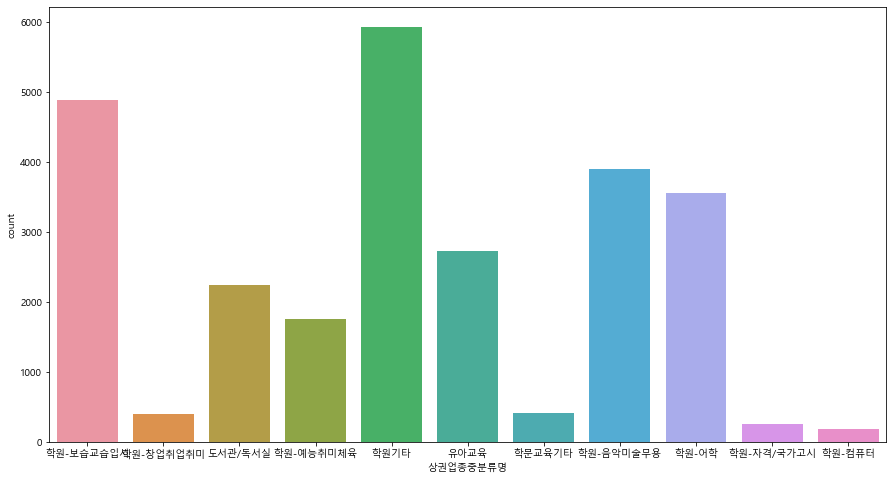

In [79]:
plt.figure(figsize = (15,8))
sa = sns.countplot(data = c, x = '상권업종중분류명')

- 강남구에 대해서만 시각화

In [55]:
a = sales[(sales['시군구명'] == '강남구')]
a

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
7,25530299,고향생막걸리,NaN,Q,음식,Q09,유흥주점,Q09A04,민속주점,I56219,기타 주점업,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1168010700106150001,1,대지,615,1.0,서울특별시 강남구 신사동 615-1,116803122007,서울특별시 강남구 압구정로,216,NaN,1168010700106150001009703,코끼리상가,"서울특별시 강남구 압구정로 216, (신사동)",135894,6023,NaN,1,NaN,127.031012,37.528073
22,15551341,대동석유압구정주유소,NaN,F,생활서비스,F16,주유소/충전소,F16A01,주유소,G47711,차량용 주유소 운영업,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1168010700106330000,1,대지,633,NaN,서울특별시 강남구 신사동 633,116803005086,서울특별시 강남구 언주로,842,NaN,1168010700106330000010193,SK압구정주유소,"서울특별시 강남구 언주로 842, (신사동)",135895,6020,NaN,NaN,NaN,127.033876,37.525321
31,28500399,캐논비즈니스프라자전시장,비즈니스프라자전시장,D,소매,D08,사무/문구/컴퓨터,D08A02,사무용기기소매,G47821,사무용 기기 소매업,11,서울특별시,11680,강남구,1168058000,삼성1동,1168010500,삼성동,1168010500101680012,1,대지,168,12.0,서울특별시 강남구 삼성동 168-12,116803122010,서울특별시 강남구 테헤란로,607,NaN,1168010500101680012000001,캐논케이타워,"서울특별시 강남구 테헤란로 607, (삼성동)",135882,6173,NaN,1,NaN,127.063987,37.509507
34,6112563,소낙스,역삼점,F,생활서비스,F14,자동차/이륜차,F14A04,세차장,S95213,자동차 세차업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100106940025,1,대지,694,25.0,서울특별시 강남구 역삼동 694-25,116803122006,서울특별시 강남구 선릉로,537,NaN,1168010100106940026027618,미네르바,"서울특별시 강남구 선릉로 537, (역삼동)",135917,6149,NaN,NaN,NaN,127.046474,37.507105
35,20783574,선경바둑,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A09,기원,R91293,기원 운영업,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1168010700106380005,1,대지,638,5.0,서울특별시 강남구 신사동 638-5,116803122007,서울특별시 강남구 압구정로,310,NaN,1168010700106380005009660,고려빌딩,"서울특별시 강남구 압구정로 310, (신사동)",135896,6017,NaN,3,NaN,127.035280,37.528775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361450,18761432,엠에스미래,NaN,F,생활서비스,F05,인력/고용/용역알선,F05A02,인력공급/고용알선,NaN,NaN,11,서울특별시,11680,강남구,1168059000,삼성2동,1168010500,삼성동,1168010500101200017,1,대지,120,17.0,서울특별시 강남구 삼성동 120-17,116804166388,서울특별시 강남구 삼성로103길,6,NaN,1168010500101200017016543,NaN,"서울특별시 강남구 삼성로103길 6, (삼성동)",135509,6155,NaN,NaN,NaN,127.054020,37.510509
361467,18778038,수학교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11680,강남구,1168063000,대치4동,1168010600,대치동,1168010600109310001,1,대지,931,1.0,서울특별시 강남구 대치동 931-1,116804166420,서울특별시 강남구 삼성로67길,3,NaN,1168010600109310001013263,NaN,"서울특별시 강남구 삼성로67길 3, (대치동)",135998,6203,NaN,NaN,NaN,127.059093,37.501097
361468,18763633,삼마프라퍼티,NaN,L,부동산,L03,분양,L03A04,건물분양-종합,NaN,NaN,11,서울특별시,11680,강남구,1168065000,역삼2동,1168010100,역삼동,1168010100107330011,1,대지,733,11.0,서울특별시 강남구 역삼동 733-11,116804166196,서울특별시 강남구 논현로76길,24,NaN,1168010100107330011024363,NaN,"서울특별시 강남구 논현로76길 24, (역삼동)",135514,6224,NaN,5,NaN,127.040762,37.497346
361474,18770562,현매니지먼트,NaN,R,학문/교육,R04,학원-어학,R04A01,학원-외국어/어학,P85502,외국어학원,11,서울특별시,11680,강남구,1168053100,논현2동,1168010800,논현동,1168010800101130020,1,대지,113,20.0,서울특별시 강남구 논현동 113-20,116804166576,서울특별시 강남구 언주로134길,35,NaN,1168010800101130020005912,NaN,"서울특별시 강남구 언주로134길 35, (논현동)",135821,6059,NaN,5,NaN,127.038392,37.517267


<AxesSubplot:xlabel='상권업종중분류명', ylabel='count'>

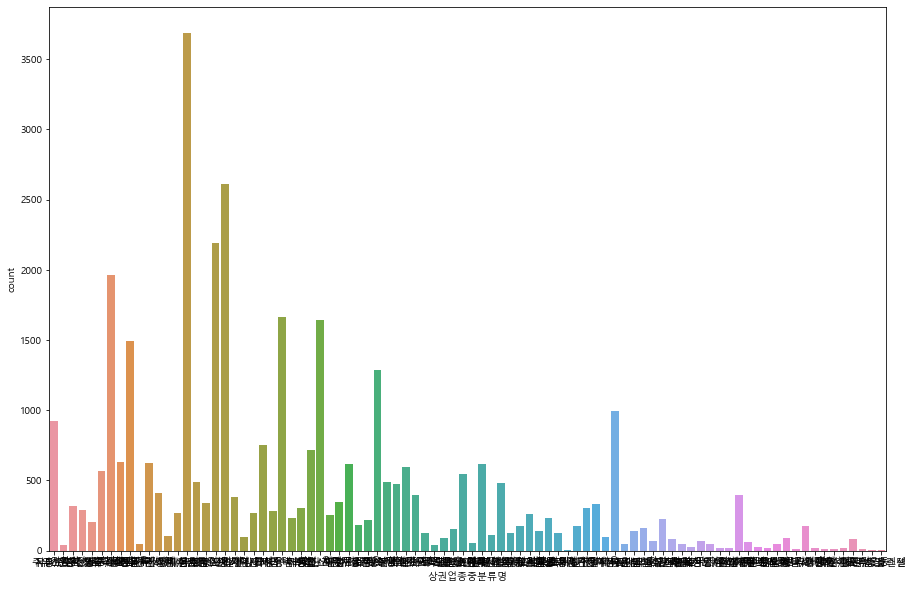

In [82]:
plt.figure(figsize = (15,10))
sns.countplot(data = a, x = '상권업종중분류명')

- 관심 동네 비교해보기